# Load Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from os import path, walk, listdir
from pprint import pprint
from datetime import datetime

# Data Loading

In [2]:
BASE_DIR = './data'
PRICE_DIR = path.join(BASE_DIR, 'daily_price')
SIC_DIR = path.join(BASE_DIR, 'sic4_codes')

In [7]:
df_prices = pd.DataFrame()
for f in listdir(PRICE_DIR):
    p = path.join(PRICE_DIR,f)
    if path.isfile(p):
        try:
            df = pd.read_csv(p)
            info = f.replace('_daily_price.csv', '').split('_')
            df['composite_ticker'] = ':'.join(info[0:2])
            df['security_id'] = '_'.join(info[2:])
            df['open_diff'] = df.open - df.open.shift(1)
            df['close_diff'] = df.close - df.close.shift(1)
            df['intraday_range'] = df.high - df.low
            df['volumne_diff'] = df.volume - df.volume.shift(1)
            df['overnight_diff'] = df.open - df.close.shift(1)
            
            df['adj_open_diff'] = df.adj_open - df.adj_open.shift(1)
            df['adj_close_diff'] = df.adj_close - df.adj_close.shift(1)
            df['adj_intraday_range'] = df.adj_high - df.adj_low
            df['adj_low_diff'] = df.adj_low - df.adj_low.shift(1)
            df['adj_volumne_diff'] = df.adj_volume - df.adj_volume.shift(1)
            df['adj_overnight_diff'] = df.adj_open - df.adj_close.shift(1)
            
            df['open_diff_pct'] = df.open_diff / df.open
            df['close_diff_pct'] = df.close_diff / df.close
            df['overnight_diff_pct'] = df.overnight_diff / df.close.shift(1)
            
            df_prices = pd.concat([df_prices, df], ignore_index=True)
        except pd.errors.EmptyDataError:
            print(p)

./data\daily_price\BGO_US_sec_gVE5D0_daily_price.csv
./data\daily_price\BIIB V_US_sec_z9mn6D_daily_price.csv
./data\daily_price\BLZ_US_sec_zJlMae_daily_price.csv
./data\daily_price\C.VS_US_sec_Xa8qOD_daily_price.csv
./data\daily_price\CTXS V_US_sec_XGY3vb_daily_price.csv
./data\daily_price\EIF_US_sec_gQLBjK_daily_price.csv
./data\daily_price\EKD_US_sec_z5dlnx_daily_price.csv
./data\daily_price\FCX A_US_sec_X6DnQ6_daily_price.csv
./data\daily_price\GE4317671_US_sec_gkx15o_daily_price.csv
./data\daily_price\HLT WI_US_sec_z9d0Pj_daily_price.csv
./data\daily_price\HON WI_US_sec_zo28V4_daily_price.csv
./data\daily_price\JPL.E_US_sec_yRWlYa_daily_price.csv
./data\daily_price\JPM3995814_US_sec_X7po9P_daily_price.csv
./data\daily_price\SPC_US_sec_z8w9Kb_daily_price.csv
./data\daily_price\VAR WI_US_sec_gxNPDK_daily_price.csv


In [8]:
df_prices.head()

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,...,overnight_diff,adj_open_diff,adj_close_diff,adj_intraday_range,adj_low_diff,adj_volumne_diff,adj_overnight_diff,open_diff_pct,close_diff_pct,overnight_diff_pct
0,2005-12-30,False,daily,37.55,37.58,36.92,37.14,463271.0,35.394313,35.422591,...,NaN,NaN,NaN,0.622110,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-12-29,False,daily,37.45,37.95,37.19,37.38,508847.0,35.300054,35.771350,...,0.31,-0.094259,0.226222,0.716370,0.254500,45576.0,0.292203,-0.002670,0.006421,0.008347
2,2005-12-28,False,daily,38.00,38.15,36.35,37.45,878820.0,35.818480,35.959868,...,0.62,0.518425,0.065981,1.696665,-0.791777,369973.0,0.584407,0.014474,0.001869,0.016586
3,2005-12-27,False,daily,37.99,38.80,37.20,37.46,1277212.0,35.809054,36.572553,...,0.54,-0.009426,0.009426,1.508147,0.801203,398392.0,0.508999,-0.000263,0.000267,0.014419
4,2005-12-23,False,daily,36.73,38.00,36.73,37.73,1321716.0,34.621388,35.818480,...,-0.73,-1.187665,0.254500,1.197091,-0.443018,44504.0,-0.688092,-0.034304,0.007156,-0.019487


In [9]:
df_prices.to_csv('./data/prices.csv', index=False)

In [10]:
df_company_info = pd.read_csv(path.join(BASE_DIR, 'company_info.csv'))
df_company_info.head()

,id,ticker,name,lei,legal_name,stock_exchange,sic,short_description,long_description,ceo,...,entity_status,sector,industry_category,industry_group,template,standardized_active,first_fundamental_date,last_fundamental_date,first_stock_price_date,last_stock_price_date
0,com_NX6GzO,AAPL,Apple Inc,HWUPKR0MPOU8FGXBT394,APPLE INC,NASDAQ,3571,"Apple, Inc. engages in the design, manufacture...","Apple Inc. designs, manufactures, and markets ...",Tim Cook,...,ACTIVE,Consumer Goods,Consumer Durables,Electronic Equipment,indu,True,2007-09-29,2020-03-28,1980-12-12,2020-07-30
1,com_2zvNzA,XOM,Exxon Mobil Corp,J3WHBG0MTS7O8ZVMDC91,EXXON MOBIL CORP,NYSE,2911,"Exxon Mobil Corp. engages in the exploration, ...",Exxon Mobil Corporation explores for and produ...,Darren W. Woods,...,ACTIVE,Basic Materials,Energy,Major Integrated Oil & Gas,indu,True,2007-12-31,2020-03-31,1970-01-02,2020-07-30
2,com_0XLDXx,ORCL,Oracle Corp,1Z4GXXU7ZHVWFCD8TV52,ORACLE CORP,NYSE,7372,Oracle Corp. provides enterprise software and ...,"Oracle Corporation develops, manufactures, mar...",Larry Ellison,...,ACTIVE,Technology,Computer Software & Services,Application Software,indu,True,2008-05-31,2020-05-31,1986-03-12,2020-07-30
3,com_VXWJgv,KO,Coca-Cola Co,UWJKFUJFZ02DKWI3RY53,COCA COLA CO,NYSE,2080,The Coca-Cola Co. operates as a beverage compa...,"The Coca-Cola Company, a beverage company, man...",Ahmet Muhtar Kent,...,ACTIVE,Consumer Goods,Food & Beverage,Beverages - Soft Drinks,indu,True,2007-12-31,2020-06-26,1962-01-02,2020-07-30
4,com_NgYGzd,INTC,Intel Corp,KNX4USFCNGPY45LOCE31,INTEL CORP,NASDAQ,3674,"Intel Corp. designs, manufactures and sells co...","Intel Corporation designs, manufactures, and s...",Brian M. Krzanich,...,ACTIVE,Technology,Electronics,Semiconductor - Broad Line,indu,True,2007-12-29,2020-06-27,1980-03-17,2020-07-30


In [11]:
df_company_info['company_id'] = df_company_info.id
df_company_info = df_company_info.drop(columns=['id'])

In [12]:
df_securities = pd.read_csv(path.join(BASE_DIR, 'securities_list.csv'))
df_securities.head()

,id,company_id,name,code,currency,ticker,composite_ticker,figi,composite_figi,share_class_figi
0,sec_agjrgj,com_NX6GzO,Apple Inc,EQS,USD,AAPL,AAPL:US,BBG000B9Y5X2,BBG000B9XRY4,BBG001S5N8V8
1,sec_gkmNYz,com_2zvNzA,Exxon Mobil Corp.,EQS,USD,XOM,XOM:US,BBG000GZQBJ1,BBG000GZQ728,BBG001S69V32
2,sec_gPV3vz,com_0XLDXx,Oracle Corp.,EQS,USD,ORCL,ORCL:US,BBG000BQLY10,BBG000BQLTW7,BBG001S5SJG6
3,sec_X7m9Zy,com_VXWJgv,Coca-Cola Co,EQS,USD,KO,KO:US,BBG000BMX4N8,BBG000BMX289,BBG001S5SMQ8
4,sec_zvNxEz,com_NgYGzd,Intel Corp.,EQS,USD,INTC,INTC:US,BBG000C0GFS4,BBG000C0G1D1,BBG001S5SF65


In [13]:
df_securities['security_id'] = df_securities.id
df_securities = df_securities.drop(columns=['id'])

In [14]:
df_company_securities = pd.merge(
    df_securities[['security_id', 'company_id', 'name', 'ticker']],
    df_company_info[['company_id', 'stock_exchange', 'sector', 'industry_category', 'industry_group']],
    on=['company_id'], how='left'
)

In [15]:
df_company_securities.head()

,security_id,company_id,name,ticker,stock_exchange,sector,industry_category,industry_group
0,sec_agjrgj,com_NX6GzO,Apple Inc,AAPL,NASDAQ,Consumer Goods,Consumer Durables,Electronic Equipment
1,sec_gkmNYz,com_2zvNzA,Exxon Mobil Corp.,XOM,NYSE,Basic Materials,Energy,Major Integrated Oil & Gas
2,sec_gPV3vz,com_0XLDXx,Oracle Corp.,ORCL,NYSE,Technology,Computer Software & Services,Application Software
3,sec_X7m9Zy,com_VXWJgv,Coca-Cola Co,KO,NYSE,Consumer Goods,Food & Beverage,Beverages - Soft Drinks
4,sec_zvNxEz,com_NgYGzd,Intel Corp.,INTC,NASDAQ,Technology,Electronics,Semiconductor - Broad Line


In [17]:
df_prices = pd.merge(df_prices, df_company_securities, on=['security_id'], how='left')

In [18]:
df_prices.head()

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,...,open_diff_pct,close_diff_pct,overnight_diff_pct,company_id,name,ticker,stock_exchange,sector,industry_category,industry_group
0,2005-12-30,False,daily,37.55,37.58,36.92,37.14,463271.0,35.394313,35.422591,...,NaN,NaN,NaN,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
1,2005-12-29,False,daily,37.45,37.95,37.19,37.38,508847.0,35.300054,35.771350,...,-0.002670,0.006421,0.008347,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
2,2005-12-28,False,daily,38.00,38.15,36.35,37.45,878820.0,35.818480,35.959868,...,0.014474,0.001869,0.016586,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
3,2005-12-27,False,daily,37.99,38.80,37.20,37.46,1277212.0,35.809054,36.572553,...,-0.000263,0.000267,0.014419,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
4,2005-12-23,False,daily,36.73,38.00,36.73,37.73,1321716.0,34.621388,35.818480,...,-0.034304,0.007156,-0.019487,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines


In [19]:
df_prices['date'] = pd.to_datetime(df_prices['date'])

# S&P500 Companies Analysis

In [64]:
print(f'Number of Companies: {len(df_company_info.company_id)}')

Number of Companies: 498


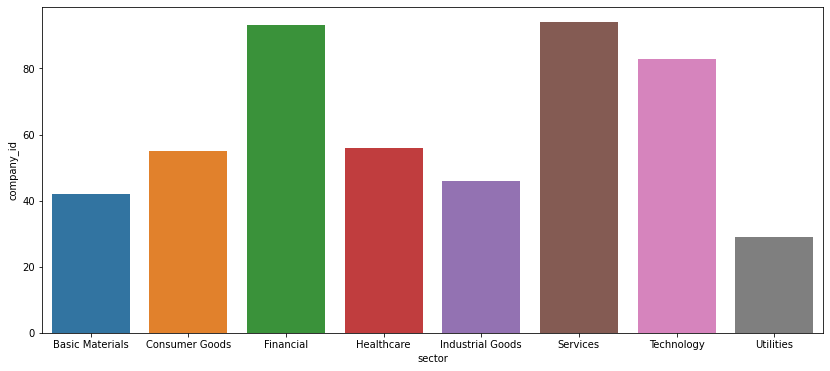

In [63]:
plt.figure(figsize=(14,6))
sns.barplot(x='sector', y='company_id', data=df_company_info.groupby('sector').count().reset_index())

In [21]:
df_prices_limited = df_prices.loc[(df_prices['date'] >= pd.to_datetime('1990-01-01')),:]

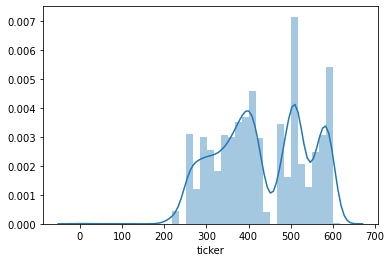

In [23]:
sns.distplot(df_prices_limited.groupby('date').ticker.count())

In [26]:
df_prices_limited.sector.unique()

array(['Services', 'Consumer Goods', 'Healthcare', 'Financial',
       'Technology', 'Utilities', 'Basic Materials', 'Industrial Goods',
       nan], dtype=object)

In [25]:
df_prices_limited.loc[df_prices_limited['sector']=='Utilities',:]

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,...,open_diff_pct,close_diff_pct,overnight_diff_pct,company_id,name,ticker,stock_exchange,sector,industry_category,industry_group
94910,1998-12-31,False,daily,42.44,42.6900,42.12,42.69,120400.0,14.789772,14.876893,...,NaN,NaN,NaN,com_mgwray,Ameren Corp.,AEE,NYSE,Utilities,Utilities,Electric Utilities
94911,1998-12-30,False,daily,42.63,42.6300,42.06,42.38,160200.0,14.855984,14.855984,...,0.004457,-0.007315,-0.001405,com_mgwray,Ameren Corp.,AEE,NYSE,Utilities,Utilities,Electric Utilities
94912,1998-12-29,False,daily,42.38,42.6300,42.19,42.50,362000.0,14.768863,14.855984,...,-0.005899,0.002824,0.000000,com_mgwray,Ameren Corp.,AEE,NYSE,Utilities,Utilities,Electric Utilities
94913,1998-12-28,False,daily,42.06,42.6900,42.06,42.38,199500.0,14.657347,14.876893,...,-0.007608,-0.002832,-0.010353,com_mgwray,Ameren Corp.,AEE,NYSE,Utilities,Utilities,Electric Utilities
94914,1998-12-24,False,daily,42.38,42.5000,42.25,42.31,31000.0,14.768863,14.810681,...,0.007551,-0.001654,0.000000,com_mgwray,Ameren Corp.,AEE,NYSE,Utilities,Utilities,Electric Utilities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707531,2020-01-08,False,daily,62.59,62.6400,62.12,62.40,4828886.0,61.736863,61.786182,...,0.007030,-0.002244,0.000799,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities
3707532,2020-01-07,False,daily,62.15,62.5168,61.97,62.46,1861698.0,61.302861,61.664661,...,-0.007080,0.000961,-0.004006,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities
3707533,2020-01-06,False,daily,62.76,62.9400,62.33,62.59,2200563.0,61.904546,62.082093,...,0.009720,0.002077,0.004803,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities
3707534,2020-01-03,False,daily,62.28,62.9150,62.28,62.68,2422522.0,61.431089,62.057433,...,-0.007707,0.001436,-0.004953,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities


In [37]:
df_prices_limited.loc[(df_prices_limited.sector=='Utilities') & (df_prices_limited.date<pd.to_datetime('1991-1-1')),:]

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,...,open_diff_pct,close_diff_pct,overnight_diff_pct,company_id,name,ticker,stock_exchange,sector,industry_category,industry_group
105641,1990-12-31,False,daily,27.88,28.00,27.75,28.00,105700.0,6.118914,6.145251,...,0.031564,0.049286,0.047333,com_xgx08g,American Electric Power Company Inc.,AEP,NYSE,Utilities,Utilities,Electric Utilities
105642,1990-12-28,False,daily,27.88,28.00,27.75,27.75,188700.0,6.118914,6.145251,...,0.000000,-0.009009,-0.004286,com_xgx08g,American Electric Power Company Inc.,AEP,NYSE,Utilities,Utilities,Electric Utilities
105643,1990-12-27,False,daily,28.00,28.00,27.75,28.00,245900.0,6.145251,6.145251,...,0.004286,0.008929,0.009009,com_xgx08g,American Electric Power Company Inc.,AEP,NYSE,Utilities,Utilities,Electric Utilities
105644,1990-12-26,False,daily,27.88,28.00,27.75,27.88,62500.0,6.118914,6.145251,...,-0.004304,-0.004304,-0.004286,com_xgx08g,American Electric Power Company Inc.,AEP,NYSE,Utilities,Utilities,Electric Utilities
105645,1990-12-24,False,daily,28.00,28.13,27.88,27.88,162400.0,6.145251,6.173783,...,0.004286,0.000000,0.004304,com_xgx08g,American Electric Power Company Inc.,AEP,NYSE,Utilities,Utilities,Electric Utilities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700072,1990-01-08,False,daily,38.75,38.75,38.13,38.63,94500.0,4.386918,4.386918,...,0.000000,0.016309,0.019737,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities
3700073,1990-01-05,False,daily,39.13,39.38,38.75,39.00,72400.0,4.429938,4.458241,...,0.009711,0.009487,0.012943,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities
3700074,1990-01-04,False,daily,40.13,40.13,38.88,39.38,102100.0,4.543149,4.543149,...,0.024919,0.009650,0.028974,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities
3700075,1990-01-03,False,daily,40.25,40.38,39.88,40.38,63400.0,4.556735,4.571452,...,0.002981,0.024765,0.022092,com_VXWo0X,"Xcel Energy, Inc.",XEL,NASDAQ,Utilities,Utilities,Electric Utilities


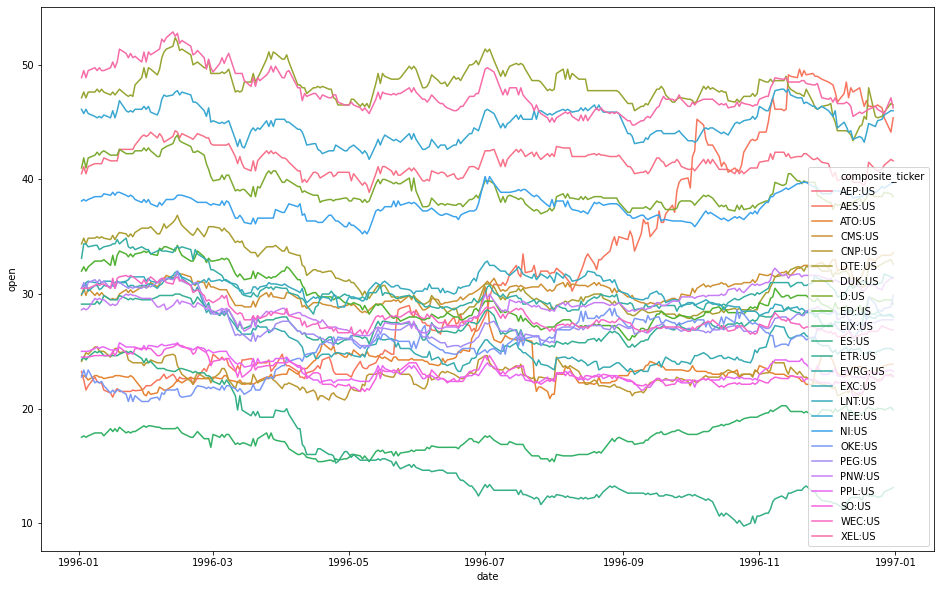

In [44]:
start_year = 1996
interval_year = 1
start_date = f'{start_year}-1-1'
end_date = f'{start_year+interval_year}-1-1'
plt.figure(figsize=(16,10))
sns.lineplot(
    x='date', y='open', hue='composite_ticker',
    data=df_prices_limited.loc[(df_prices_limited.sector=='Utilities') & (df_prices_limited.date>=pd.to_datetime(start_date)) & (df_prices_limited.date<pd.to_datetime(end_date)),:])